In [168]:
import numpy as np

sample_freq = 8000           # サンプリング周波数
cutoff_freq = 1000           # 遮断周波数（カットオフ周波数）(Hz)
N = 11                       # インパルス応答の個数
T = 1/sample_freq            # 周期
g_delay = T * ((N-1) / 2)   # 群遅延
alpha = 0.540               # ハミング窓

# omega_s = 2 * np.pi * sample_freq
omega_c = 2 * np.pi * cutoff_freq

In [169]:
abs_N = N + int(g_delay)
hw = [0] * abs_N
w = [0] * abs_N
h = [0] * abs_N

for i in range(int(g_delay), abs_N, 1):
    # 一般化ハミング窓の計算
    w[i] = alpha + ((1-alpha) * np.cos((2*np.pi*(i-(g_delay/T))) / (N-1)))
    
    # フィルタ係数の計算
    # 分母が0になる場合, sin(x)/x = 1 (x -> 0)を利用して計算
    if np.pi*(i-(g_delay/T)) == 0.0:
        h[i] = (omega_c*T) / np.pi
    else:
        h[i] = np.sin((i-(g_delay/T))*omega_c*T) / (np.pi*(i-(g_delay/T)))
    # 窓関数がかかったフィルタ係数hw(n)を計算
    hw[i] = w[i] * h[i]

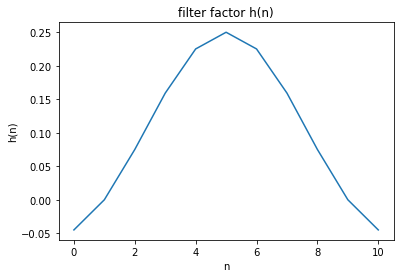

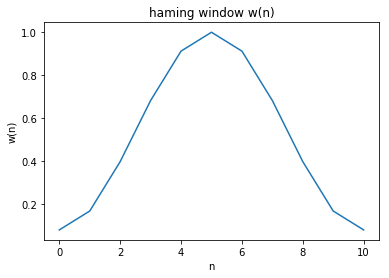

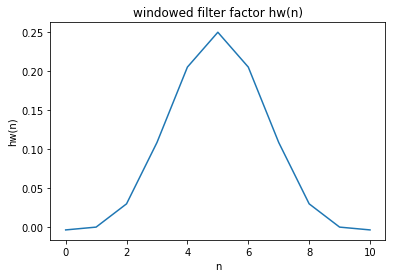

In [170]:
# プロット
import matplotlib.pyplot as plt

plt.title('filter factor h(n)')
plt.xlabel('n')
plt.ylabel('h(n)')
plt.plot(h)
plt.show()

plt.title('haming window w(n)')
plt.xlabel('n')
plt.ylabel('w(n)')
plt.plot(w)
plt.show()

plt.title('windowed filter factor hw(n)')
plt.xlabel('n')
plt.ylabel('hw(n)')
plt.plot(hw)
plt.show()

In [164]:
hw2 = [0] * N
w2 = [0] * N
h2 = [0] * N

for i in range(0, N, 1):
    # 一般化ハミング窓の計算
    w2[i] = alpha + ((1-alpha) * np.cos((2*np.pi*i) / (N-1)))
    
    # フィルタ係数の計算
    # 分母が0になる場合, sin(x)/x = 1 (x -> 0)を利用して計算
    if np.pi*i == 0.0:
        h2[i] = (omega_c*T) / np.pi
    else:
        h2[i] = np.sin(i*omega_c*T) / (np.pi*i)
    # 窓関数がかかったフィルタ係数hw(n)を計算
    hw2[i] = w[i] * h[i]

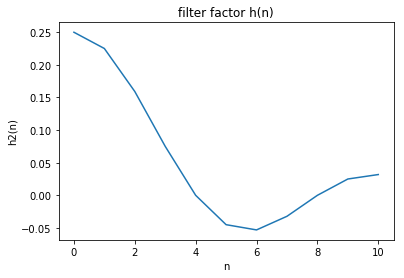

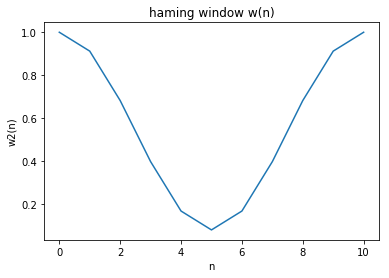

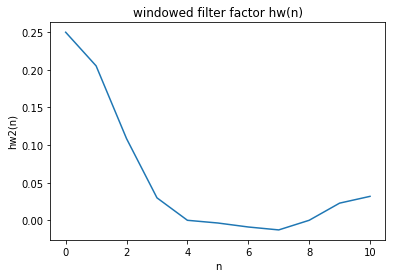

In [165]:
# プロット
import matplotlib.pyplot as plt

plt.title('filter factor h(n)')
plt.xlabel('n')
plt.ylabel('h2(n)')
plt.plot(h2)
plt.show()

plt.title('haming window w(n)')
plt.xlabel('n')
plt.ylabel('w2(n)')
plt.plot(w2)
plt.show()

plt.title('windowed filter factor hw(n)')
plt.xlabel('n')
plt.ylabel('hw2(n)')
plt.plot(hw2)
plt.show()